In [1]:
import warnings
warnings.filterwarnings('ignore')

## Project Title :  Expresso Churn Prediction Challenge from Zindi

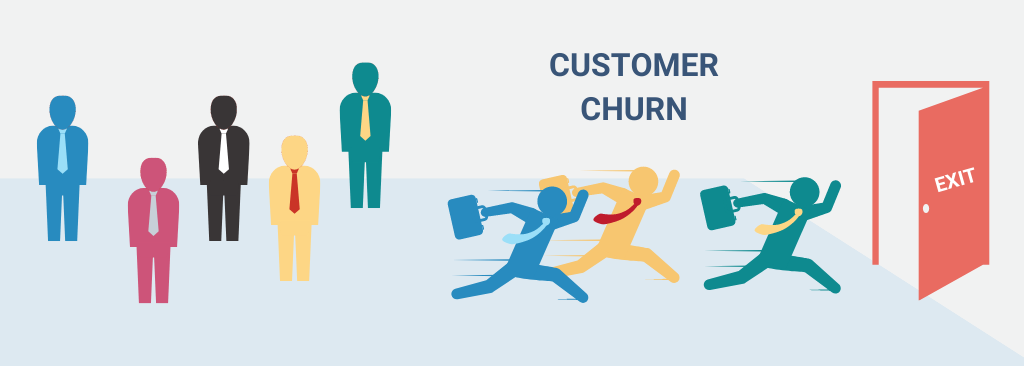

Dataset source : Zindi


# Project structure :  <br/>
 1. Dataset importing
 2. basic EDA
 3. Data visualization
 4. Feature engineering
 5. Model selection
 6. Model Training
 7. Hyperparameters Tuning
 8. Conclusions and observations
  

- Dataset importing

In [2]:
import pandas as pd
df=pd.read_csv('Expresso_churn_dataset.csv')
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


- Basic EDA

-- Dataset structure  

In [3]:
print(f'This dataset has {df.shape[0]} rows--> Instances  and {df.shape[1]} columns--> Features  ')

This dataset has 2154048 rows--> Instances  and 19 columns--> Features  


-- The first five instances of this dataset

In [4]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


-- Some information about this dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [6]:
t=list(df.dtypes.values)
print('The majority of the features are of type', *set([i for i in t if t.count(i)==max(t.count(j) for j in t) ]))

The majority of the features are of type float64


-- Some statistics about numerical features

In [7]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


-- Generating a ydata_profiling report  

In [ ]:
from ydata_profiling import ProfileReport
p=ProfileReport(df)
p.to_file('report.html')

Summarize dataset:  71%|███████   | 17/24 [03:09<02:08, 18.31s/it, Describe variable: CHURN]        

> **Observations concluded from Profile Report :** <br/>
**Missing values :** <br/>
The 35.1% of data is missing (NaN). <br/>
15/19 columns have missing values . <br/>
ZONE1 has 176803 (92.1%) missing values and ZONE2 has 179704 (93.6%) missing values. => They are ought to be deleted . <br/>
**High correlations :** <br/>
ARPU_SEGMENT is highly overall correlated with FREQUENCE . <br/>
CHURN is highly overall correlated with REGULARITY . <br/>
FREQUENCE is highly overall correlated with ARPU_SEGMENT . <br/>
FREQUENCE_RECH is highly overall correlated with ARPU_SEGMENT. <br/>
FREQ_TOP_PACK is highly overall correlated with ARPU_SEGMENT . <br/>
MONTANT is highly overall correlated with ARPU_SEGMENT . <br/>
ON_NET is highly overall correlated with ARPU_SEGMENT . <br/>
ORANGE is highly overall correlated with ARPU_SEGMENT . <br/>
REGULARITY is highly overall correlated with ARPU_SEGMENT . <br/>
REVENUE is highly overall correlated with ARPU_SEGMENT . <br/>
**Zeros :**<br/>
DATA_VOLUME ,ON_NET ,ORANGE,TIGO,ZONE1 and ZONE2 have zeros . <br/>
**Data variability :** <br/>
MRG has constant value "False". (going to be deleted because it doesn't influence the target) <br/>
TENURE is highly imbalanced (86.5%) .<br/>
DATA_VOLUME is highly skewed (γ1 = 29.80659246) <br/>
ZONE1 is highly skewed (γ1 = 20.15447396) .<br/>
==> data that is skewed needs to be treated seperately using log or square root transformation + standardization  .<br/>










- Data Cleaning


-- Dropping the MRG column because its value is always "False"

In [ ]:
df=df.drop(columns=['MRG','ZONE1','ZONE2'])

-- Handling missing values

In [ ]:
for i in df.columns :
  if df[i].dtype in ["float64","int64"]:
    df[i].fillna(value=df[i].median(),inplace=True)
  else :
    df[i].fillna(value=df[i].mode()[0],inplace=True)

-- Removing duplicates

In [ ]:
df=df.drop_duplicates()

-- Handling outliers

In [ ]:
q1={}
q3={}
outliers={}
for i in df.columns :
  if df[i].dtype in ['float64','int64']:
    q1[i]=df[i].quantile(0.25)
    q3[i]=df[i].quantile(0.75)
    iqr=q3[i]-q1[i]
    outliers[i]=df[(df[i]>=q3[i]+iqr*1.5)|(df[i]<=q1[i]-1.5*iqr)]
    print(f'The percentage of outliers in {i} columns is {len(outliers[i])*100/len(df):.2f}%')


The percentage of outliers in MONTANT columns is 13.81%
The percentage of outliers in FREQUENCE_RECH columns is 13.21%
The percentage of outliers in REVENUE columns is 13.28%
The percentage of outliers in ARPU_SEGMENT columns is 13.27%
The percentage of outliers in FREQUENCE columns is 12.94%
The percentage of outliers in DATA_VOLUME columns is 47.70%
The percentage of outliers in ON_NET columns is 18.10%
The percentage of outliers in ORANGE columns is 18.12%
The percentage of outliers in TIGO columns is 100.00%
The percentage of outliers in REGULARITY columns is 0.00%
The percentage of outliers in FREQ_TOP_PACK columns is 31.37%
The percentage of outliers in CHURN columns is 100.00%


-- Dealing with outliers

In [ ]:
import numpy as np
l=df.select_dtypes(include=[np.number]).columns
for i in l:
    q1, q3 = df[i].quantile(0.25), df[i].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    if i in ['TENURE','FREQUENCE_RECH','FREQUENCE','REGULARITY','ON_NET','ORANGE','TIGO','FREQ_TOP_PACK']:
        df = df[(df[i] >= lower) & (df[i] <= upper)]

for i in ['REVENUE','MONTANT','ARPU_SEGMENT','DATA_VOLUME']:
    df[i] = np.log1p(df[i])

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    top_categories = df[col].value_counts().nlargest(10).index
    df[col] = np.where(df[col].isin(top_categories), df[col], 'Other')
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,DAKAR,I 18-21 month,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,4,All-net 500F=2000F;5d,5.0,1
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,2,All-net 500F=2000F;5d,5.0,0
10,0000527d276a6ba8b02810cc2c1d60d25e650f5f,DAKAR,K > 24 month,5.303305,1.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,1,All-net 500F=2000F;5d,5.0,0
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,DAKAR,G 12-15 month,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,2,All-net 500F=2000F;5d,5.0,1
13,000075053fc8393648ce32568fe4d761048b739f,THIES,K > 24 month,8.006701,7.0,0.693147,0.000000,1.0,5.55296,27.0,29.0,6.0,26,All-net 500F=2000F;5d,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154034,Other,DAKAR,H 15-18 month,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,4,All-net 500F=2000F;5d,5.0,1
2154039,Other,DAKAR,K > 24 month,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,25.0,6.0,6,All-net 500F=2000F;5d,5.0,0
2154041,Other,DAKAR,K > 24 month,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,1,All-net 500F=2000F;5d,5.0,0
2154043,Other,DAKAR,K > 24 month,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,6,All-net 500F=2000F;5d,5.0,0


-- Enocoding categorical values :


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in filter(lambda x: df[x].dtype == 'object', df.columns):
    df[i] = l.fit_transform(df[i])
df


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1,0,0,5,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,4,0,5.0,1
6,1,5,7,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,2,0,5.0,0
10,2,0,7,5.303305,1.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,1,0,5.0,0
12,3,0,3,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,2,0,5.0,1
13,4,10,7,8.006701,7.0,0.693147,0.000000,1.0,5.55296,27.0,29.0,6.0,26,0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154034,9,0,4,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,4,0,5.0,1
2154039,9,0,7,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,25.0,6.0,6,0,5.0,0
2154041,9,0,7,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,1,0,5.0,0
2154043,9,0,7,8.006701,7.0,8.006701,6.908755,9.0,5.55296,27.0,29.0,6.0,6,0,5.0,0


-- Some Visualizations to investigate the data

- Churn distribution

In [ ]:
import plotly.express as px
fig=px.pie(df,values='CHURN',title='Distribution of churn',template='plotly_dark')
fig.show()

- Relationship between MONTANT and CHURN

In [ ]:
data=df.groupby('CHURN')['MONTANT'].mean().reset_index()
fig1=px.bar(data,x='CHURN',y='MONTANT',title='AVERAGE MONTANT(AMOUNT) RELATED TO CHURN ',template='plotly_dark')
fig1.show()

- Relationship between CHURN and REVENUE (monthly revenue of the client)

In [ ]:
data=df.groupby('CHURN')['REVENUE'].mean().reset_index()
fig2=px.bar(data,x='CHURN',y='REVENUE',title='AVERAGE REVENUE(CLIENT REVENUE) RELATED TO CHURN ',template='plotly_dark')
fig2.show()

- Correlation between features 

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
corelation_matrix=pd.crosstab(df)
sns.heatmap(corelation_matrix,color='cmap',format='.2f')
plt.show()

TypeError: crosstab() missing 1 required positional argument: 'columns'